In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# VISWANADH

In [2]:
df=pd.read_csv("fake_or_real_news.csv")

In [3]:
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
import seaborn as sns

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

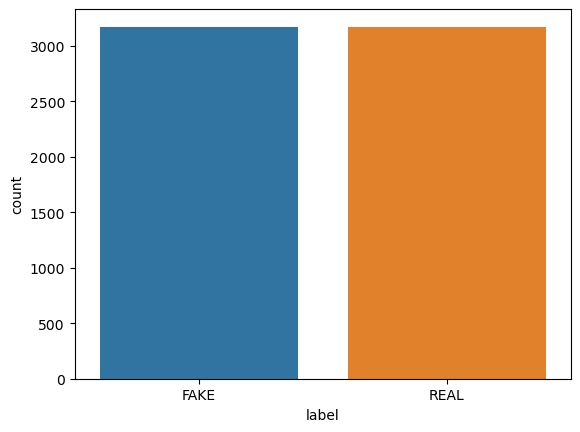

In [5]:
sns.countplot(df['label'])

In [6]:
def visualizelabelcount(dataframe):
    sns.countplot(dataframe['label'])

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


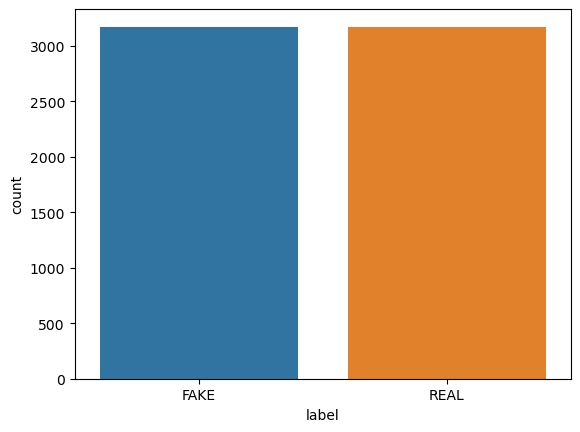

In [7]:
visualizelabelcount(df)

In [8]:
def datacheck(dataframe):
    print(dataframe.shape)
    print(dataframe.isnull().sum())
    print(dataframe.columns)
    print(dataframe.info())

In [9]:
datacheck(df)

(6335, 4)
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64
Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


In [10]:
df['text']=df['text'].str.lower()

In [11]:
df['text']

0       daniel greenfield, a shillman journalism fello...
1       google pinterest digg linkedin reddit stumbleu...
2       u.s. secretary of state john f. kerry said mon...
3       — kaydee king (@kaydeeking) november 9, 2016 t...
4       it's primary day in new york and front-runners...
                              ...                        
6330    the state department told the republican natio...
6331    the ‘p’ in pbs should stand for ‘plutocratic’ ...
6332     anti-trump protesters are tools of the oligar...
6333    addis ababa, ethiopia —president obama convene...
6334    jeb bush is suddenly attacking trump. here's w...
Name: text, Length: 6335, dtype: object

In [12]:
X=df['text']
Y=df['label']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
C=CountVectorizer(stop_words='english')

In [15]:
X_transformed=C.fit_transform(X)

In [16]:
X_transformed

<6335x67351 sparse matrix of type '<class 'numpy.int64'>'
	with 1665262 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X_transformed,Y)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr=LogisticRegression()

In [21]:
lr.fit(X_train,Y_train)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predictions=lr.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

In [26]:
print(accuracy_score(predictions,Y_test))

0.9160353535353535


In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
def givenewslabelprediction(X,Y,ml_model,nlp_model):
    X_t=nlp_model.fit_transform(X)
    x_train,x_test,y_train,y_test=train_test_split(X_t,Y)
    ml_model.fit(x_train,y_train)
    pred=ml_model.predict(x_test)
    print(accuracy_score(y_test,pred))
    cm=confusion_matrix(y_test,pred)
    sns.heatmap(cm,annot=True)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9154040404040404


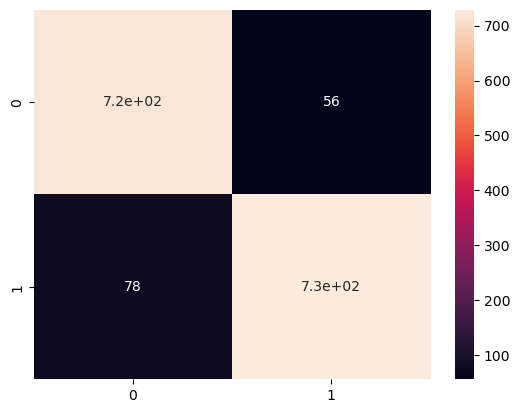

In [34]:
givenewslabelprediction(X,Y,lr,C)